# Lezione 2: Introduzione ai Large Language Models e ai Transformers

## Corso: Sviluppo di Sistemi Agentici AI per l'Analisi di Campagne Pubblicitarie

---

### Obiettivi della Lezione

In questa lezione esploreremo:
1. Cosa sono i Large Language Models (LLM) e come funzionano
2. L'architettura Transformer e i suoi componenti chiave
3. Panoramica dei principali modelli LLM disponibili
4. Applicazioni pratiche in ambito aziendale

---

## Parte 1: Cosa sono i Large Language Models

I Large Language Models sono modelli di intelligenza artificiale addestrati su enormi quantità di testo per comprendere e generare linguaggio naturale. A differenza dei sistemi tradizionali basati su regole, gli LLM apprendono pattern linguistici direttamente dai dati.

### Caratteristiche principali:

- **Comprensione del contesto**: Gli LLM analizzano il significato delle parole in base al contesto circostante
- **Generazione coerente**: Producono testo fluido e grammaticalmente corretto
- **Multitask**: Possono svolgere diverse attività senza essere riprogrammati
- **Few-shot learning**: Imparano nuovi compiti con pochi esempi

## Parte 2: L'Architettura Transformer

L'architettura Transformer, introdotta nel 2017 nel paper "Attention is All You Need", rappresenta la base di tutti i moderni LLM.

### Componenti Fondamentali

#### 1. Token
I token sono le unità base di elaborazione. Il testo viene suddiviso in token che possono rappresentare parole intere, parti di parole o singoli caratteri.

**Esempio di tokenizzazione:**

In [17]:
# Installiamo la libreria tiktoken per la tokenizzazione (usata da OpenAI)
# !pip install tiktoken

import tiktoken

# Creiamo un encoder per GPT-4
encoding = tiktoken.encoding_for_model("gpt-4")

# Esempio di testo
testo = "Analisi delle performance di una campagna pubblicitaria televisiva."

# Tokenizziamo il testo
tokens = encoding.encode(testo)

print(f"Testo originale: {testo}")
print(f"\nNumero di token: {len(tokens)}")
print(f"\nToken IDs: {tokens}")

# Decodifichiamo ogni token
print("\nToken decodificati:")
for i, token_id in enumerate(tokens):
    token_text = encoding.decode([token_id])
    print(f"  {i+1}. '{token_text}' (ID: {token_id})")

Testo originale: Analisi delle performance di una campagna pubblicitaria televisiva.

Numero di token: 14

Token IDs: [63085, 13532, 28071, 5178, 1891, 5203, 3190, 56057, 61249, 6154, 10649, 91065, 10126, 13]

Token decodificati:
  1. 'Anal' (ID: 63085)
  2. 'isi' (ID: 13532)
  3. ' delle' (ID: 28071)
  4. ' performance' (ID: 5178)
  5. ' di' (ID: 1891)
  6. ' una' (ID: 5203)
  7. ' camp' (ID: 3190)
  8. 'agna' (ID: 56057)
  9. ' pubb' (ID: 61249)
  10. 'licit' (ID: 6154)
  11. 'aria' (ID: 10649)
  12. ' televis' (ID: 91065)
  13. 'iva' (ID: 10126)
  14. '.' (ID: 13)


#### 2. Self-Attention (Auto-Attenzione)

Il meccanismo di self-attention permette al modello di considerare tutte le parole di una frase contemporaneamente, assegnando diversi "pesi di attenzione" a ciascuna parola in base alla loro rilevanza contestuale.

**Esempio concettuale:**

Nella frase: *"La campagna pubblicitaria ha raggiunto il target previsto"*

- Quando il modello elabora "target", presta particolare attenzione a "campagna" e "pubblicitaria"
- Quando elabora "previsto", si focalizza su "target" e "raggiunto"

Questo meccanismo permette al modello di catturare relazioni a lungo raggio nel testo.

**Visualizzazione semplificata del meccanismo:**

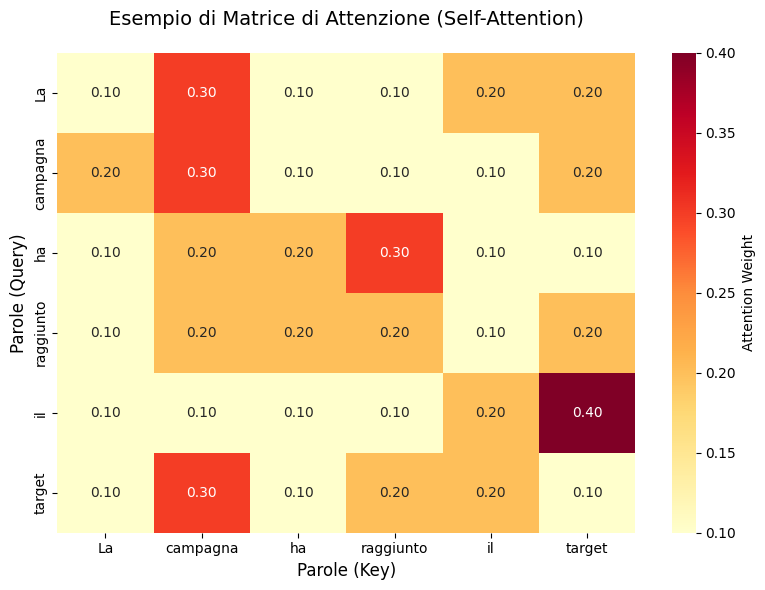


Interpretazione:
- Colori più intensi indicano maggiore attenzione
- 'il' presta molta attenzione a 'target' (0.4)
- 'campagna' è rilevante per molte altre parole


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Esempio semplificato di matrice di attenzione
parole = ['La', 'campagna', 'ha', 'raggiunto', 'il', 'target']

# Matrice di attenzione simulata (normalizzata)
# Ogni riga mostra quanto una parola "presta attenzione" alle altre
attention_matrix = np.array([
    [0.1, 0.3, 0.1, 0.1, 0.2, 0.2],  # La
    [0.2, 0.3, 0.1, 0.1, 0.1, 0.2],  # campagna
    [0.1, 0.2, 0.2, 0.3, 0.1, 0.1],  # ha
    [0.1, 0.2, 0.2, 0.2, 0.1, 0.2],  # raggiunto
    [0.1, 0.1, 0.1, 0.1, 0.2, 0.4],  # il
    [0.1, 0.3, 0.1, 0.2, 0.2, 0.1],  # target
])

# Visualizziamo la matrice
plt.figure(figsize=(8, 6))
sns.heatmap(attention_matrix, 
            xticklabels=parole, 
            yticklabels=parole,
            annot=True, 
            fmt='.2f',
            cmap='YlOrRd',
            cbar_kws={'label': 'Attention Weight'})
plt.title('Esempio di Matrice di Attenzione (Self-Attention)', fontsize=14, pad=20)
plt.xlabel('Parole (Key)', fontsize=12)
plt.ylabel('Parole (Query)', fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretazione:")
print("- Colori più intensi indicano maggiore attenzione")
print("- 'il' presta molta attenzione a 'target' (0.4)")
print("- 'campagna' è rilevante per molte altre parole")

#### 3. Context Window (Finestra di Contesto)

Il context window rappresenta la quantità massima di testo che un modello può elaborare in una singola volta. È misurato in token.

**Esempi di context window:**
- GPT-3.5: 4,096 token (~3,000 parole)
- GPT-4: 8,192 token (~6,000 parole) o 32,768 token (~24,000 parole)
- Claude 3: fino a 200,000 token (~150,000 parole)

**Calcolo pratico:**

In [5]:
# Esempio: calcoliamo quanti token occupa un documento

documento_esempio = """
REPORT CAMPAGNA PUBBLICITARIA Q3 2024

Sintesi Esecutiva:
La campagna pubblicitaria condotta nel terzo trimestre 2024 ha raggiunto complessivamente
5.2 milioni di contatti unici, con una reach del 45% sul target Adults 25-54.
La frequency media è stata di 3.8 esposizioni per persona.

Performance per Broadcaster:
- MTV: 2.1M contatti (40% del totale)
- Sanoma: 1.8M contatti (35% del totale)
- Altri: 1.3M contatti (25% del totale)

Analisi per Device:
- Big Screen (TV): 70% degli impatti
- Small Screen (Mobile/Tablet): 30% degli impatti

Conclusioni:
La campagna ha superato gli obiettivi prefissati di reach del 40%, dimostrando
un'efficacia particolare sul target primario. Si raccomanda di replicare
la strategia nel prossimo trimestre.
"""

# Contiamo i token
tokens_documento = encoding.encode(documento_esempio)
num_tokens = len(tokens_documento)

print(f"Lunghezza del documento: {len(documento_esempio)} caratteri")
print(f"Numero di parole (circa): {len(documento_esempio.split())} parole")
print(f"Numero di token: {num_tokens} token")
print(f"\nRapporto token/parola: {num_tokens / len(documento_esempio.split()):.2f}")

# Verifica compatibilità con diversi modelli
modelli_context = {
    "GPT-3.5": 4096,
    "GPT-4 (base)": 8192,
    "GPT-4 (extended)": 32768,
    "Claude 3": 200000
}

print("\nCompatibilità con i modelli:")
for modello, limit in modelli_context.items():
    percentuale = (num_tokens / limit) * 100
    print(f"  {modello}: {percentuale:.2f}% del context window utilizzato")

Lunghezza del documento: 746 caratteri
Numero di parole (circa): 110 parole
Numero di token: 240 token

Rapporto token/parola: 2.18

Compatibilità con i modelli:
  GPT-3.5: 5.86% del context window utilizzato
  GPT-4 (base): 2.93% del context window utilizzato
  GPT-4 (extended): 0.73% del context window utilizzato
  Claude 3: 0.12% del context window utilizzato


## Parte 3: Panoramica dei Principali Modelli LLM

Esaminiamo i modelli più diffusi e le loro caratteristiche distintive:

### 1. GPT (Generative Pre-trained Transformer) - OpenAI

**Caratteristiche:**
- Famiglia di modelli proprietari
- GPT-4 è attualmente uno dei modelli più avanzati
- Eccelle in ragionamento complesso e task creativi
- Disponibile tramite API a pagamento

**Casi d'uso tipici:**
- Generazione di contenuti marketing
- Analisi di sentiment
- Assistenza clienti automatizzata

### 2. Claude - Anthropic

**Caratteristiche:**
- Focus su sicurezza e affidabilità
- Context window molto ampio (fino a 200K token)
- Eccellente per analisi di documenti lunghi
- Disponibile tramite API

**Casi d'uso tipici:**
- Analisi di report estesi
- Summarization di documenti
- Assistenti per task complessi

### 3. Llama - Meta

**Caratteristiche:**
- Modelli open-source
- Possono essere eseguiti in locale
- Diverse dimensioni (7B, 13B, 70B parametri)
- Ottimo rapporto qualità/costo

**Casi d'uso tipici:**
- Applicazioni che richiedono privacy dei dati
- Deployment on-premise
- Fine-tuning per domini specifici

### 4. Mistral - Mistral AI

**Caratteristiche:**
- Modelli europei open-source e proprietari
- Ottima efficienza computazionale
- Multilinguismo avanzato
- Diverse varianti (Mistral 7B, Mixtral 8x7B)

**Casi d'uso tipici:**
- Applicazioni multilingue
- Deployment con risorse limitate
- Task che richiedono velocità di risposta

### Confronto Pratico dei Modelli

In [19]:
import pandas as pd

# Tabella comparativa dei principali LLM
confronto_modelli = pd.DataFrame({
    'Modello': ['GPT-4', 'Claude 3 Opus', 'Llama 3 70B', 'Mistral Large'],
    'Parametri': ['~1.7T (stimato)', '~200B (stimato)', '70B', '~100B (stimato)'],
    'Context Window': ['128K tokens', '200K tokens', '8K tokens', '32K tokens'],
    'Tipo': ['Proprietario', 'Proprietario', 'Open-source', 'Proprietario'],
    'Costo (1M token)': ['$30 input/$60 output', '$15 input/$75 output', 'Gratuito (self-host)', '$8 input/$24 output'],
    'Punti di Forza': [
        'Ragionamento complesso, versatilità',
        'Documenti lunghi, accuratezza',
        'Deployment locale, privacy',
        'Multilinguismo, efficienza'
    ]
})

print("\nCONFRONTO PRINCIPALI LLM\n")
display(confronto_modelli)
# Nota: i prezzi sono indicativi e possono variare


CONFRONTO PRINCIPALI LLM



,Modello,Parametri,Context Window,Tipo,Costo (1M token),Punti di Forza
0,GPT-4,~1.7T (stimato),128K tokens,Proprietario,$30 input/$60 output,"Ragionamento complesso, versatilità"
1,Claude 3 Opus,~200B (stimato),200K tokens,Proprietario,$15 input/$75 output,"Documenti lunghi, accuratezza"
2,Llama 3 70B,70B,8K tokens,Open-source,Gratuito (self-host),"Deployment locale, privacy"
3,Mistral Large,~100B (stimato),32K tokens,Proprietario,$8 input/$24 output,"Multilinguismo, efficienza"


## Model selection criteria

1. Context window size
2. Budget (cost per million tokens)
3. Privacy requirements (local vs cloud)    
4. Multilingual capabilities
5. Latency requirements

## Parte 4: Applicazioni Pratiche in Ambito Aziendale

Gli LLM trovano numerose applicazioni nel contesto business. Vediamo alcuni esempi concreti.

### Applicazione 1: Assistenti Conversazionali

Gli LLM possono essere utilizzati per creare assistenti che rispondono a domande in linguaggio naturale.

**Esempio pratico:** Assistente per query su campagne pubblicitarie

In [7]:
# Simulazione di un assistente conversazionale
# (In produzione, questo utilizzerebbe chiamate API a modelli reali)

class CampaignAssistant:
    """
    Simulazione di un assistente per analisi campagne.
    Nella realtà, userebbe chiamate API a un LLM.
    """
    
    def __init__(self):
        # Dati di esempio
        self.campaign_data = {
            'nome': 'Campagna Autunno 2024',
            'reach': '45%',
            'frequency': 3.8,
            'impressions': 5200000,
            'target': 'Adults 25-54',
            'periodo': '2024-09-01 to 2024-09-30'
        }
    
    def process_query(self, query):
        """
        Simula l'elaborazione di una query.
        In un'applicazione reale, questo invierebbe la query a un LLM.
        """
        query_lower = query.lower()
        
        if 'reach' in query_lower:
            return f"La reach della campagna '{self.campaign_data['nome']}' è del {self.campaign_data['reach']} sul target {self.campaign_data['target']}."
        
        elif 'frequency' in query_lower or 'frequenza' in query_lower:
            return f"La frequency media è di {self.campaign_data['frequency']} esposizioni per persona."
        
        elif 'impression' in query_lower or 'contatt' in query_lower:
            impressions_formatted = f"{self.campaign_data['impressions']:,}".replace(',', '.')
            return f"La campagna ha generato {impressions_formatted} impressions totali."
        
        elif 'target' in query_lower:
            return f"Il target della campagna è: {self.campaign_data['target']}."
        
        elif 'periodo' in query_lower or 'quando' in query_lower:
            return f"La campagna è stata attiva nel periodo: {self.campaign_data['periodo']}."
        
        else:
            return "Mi dispiace, non ho compreso la domanda. Posso rispondere a domande su reach, frequency, impressions, target e periodo della campagna."

# Test dell'assistente
assistant = CampaignAssistant()

domande = [
    "Qual è stata la reach della campagna?",
    "Quante impressions abbiamo ottenuto?",
    "Qual era la frequency media?",
    "Qual è il target?"
]

print("ESEMPIO DI INTERAZIONE CON ASSISTENTE CONVERSAZIONALE\n")
for domanda in domande:
    risposta = assistant.process_query(domanda)
    print(f"Utente: {domanda}")
    print(f"Assistente: {risposta}\n")

ESEMPIO DI INTERAZIONE CON ASSISTENTE CONVERSAZIONALE

Utente: Qual è stata la reach della campagna?
Assistente: La reach della campagna 'Campagna Autunno 2024' è del 45% sul target Adults 25-54.

Utente: Quante impressions abbiamo ottenuto?
Assistente: La campagna ha generato 5.200.000 impressions totali.

Utente: Qual era la frequency media?
Assistente: La frequency media è di 3.8 esposizioni per persona.

Utente: Qual è il target?
Assistente: Il target della campagna è: Adults 25-54.



### Applicazione 2: Analisi di Documenti ed Estrazione di Informazioni

Gli LLM possono analizzare documenti complessi ed estrarre informazioni strutturate.

In [8]:
# Esempio: estrazione di KPI da un report testuale

report_testuale = """
La campagna pubblicitaria "Summer Sale 2024" è stata trasmessa su diversi canali
dal 1 giugno al 30 giugno 2024. Il target principale era costituito da donne
di età compresa tra 25 e 44 anni. 

I risultati mostrano che abbiamo raggiunto 3.5 milioni di contatti unici,
pari a una reach del 52% sul target definito. La frequency media registrata
è stata di 4.2 esposizioni per persona.

L'investimento totale è stato di 250.000 euro, con un CPM (cost per mille)
di 15 euro. Il 65% degli impatti è stato registrato su big screen (TV),
mentre il restante 35% su dispositivi mobili.
"""

# Simulazione di estrazione informazioni
# In un caso reale, useremmo un LLM con prompt engineering

def extract_kpis_simulation(text):
    """
    Simula l'estrazione di KPI da un testo.
    Un LLM reale farebbe questo in modo più robusto.
    """
    import re
    
    kpis = {}
    
    # Estrazione nome campagna
    if match := re.search(r'campagna.*?"([^"]+)"', text):
        kpis['nome_campagna'] = match.group(1)
    
    # Estrazione periodo
    if match := re.search(r'dal (\d+ \w+ \d+) al (\d+ \w+ \d+)', text):
        kpis['periodo'] = f"{match.group(1)} - {match.group(2)}"
    
    # Estrazione reach
    if match := re.search(r'reach del (\d+%)', text):
        kpis['reach'] = match.group(1)
    
    # Estrazione frequency
    if match := re.search(r'frequency.*?(\d+\.\d+)', text):
        kpis['frequency'] = float(match.group(1))
    
    # Estrazione contatti
    if match := re.search(r'(\d+\.\d+) milioni di contatti', text):
        kpis['contatti_milioni'] = float(match.group(1))
    
    # Estrazione budget
    if match := re.search(r'(\d+\.\d+|\d+) euro', text):
        kpis['budget_euro'] = match.group(1)
    
    return kpis

print("TESTO ORIGINALE:")
print(report_testuale)
print("\n" + "="*50)
print("KPI ESTRATTI:\n")

kpis_estratti = extract_kpis_simulation(report_testuale)
for chiave, valore in kpis_estratti.items():
    print(f"{chiave.replace('_', ' ').title()}: {valore}")

TESTO ORIGINALE:

La campagna pubblicitaria "Summer Sale 2024" è stata trasmessa su diversi canali
dal 1 giugno al 30 giugno 2024. Il target principale era costituito da donne
di età compresa tra 25 e 44 anni. 

I risultati mostrano che abbiamo raggiunto 3.5 milioni di contatti unici,
pari a una reach del 52% sul target definito. La frequency media registrata
è stata di 4.2 esposizioni per persona.

L'investimento totale è stato di 250.000 euro, con un CPM (cost per mille)
di 15 euro. Il 65% degli impatti è stato registrato su big screen (TV),
mentre il restante 35% su dispositivi mobili.


KPI ESTRATTI:

Nome Campagna: Summer Sale 2024
Reach: 52%
Contatti Milioni: 3.5
Budget Euro: 250.000


### Applicazione 3: Generazione di Report

Gli LLM possono trasformare dati strutturati in report narrativi comprensibili.

In [9]:
# Esempio: generazione di un report narrativo da dati strutturati

def generate_campaign_report(data):
    """
    Simula la generazione di un report narrativo.
    Un LLM reale produrrebbe testo più fluido e naturale.
    """
    
    # Template di report (semplificato)
    report = f"""
REPORT CAMPAGNA PUBBLICITARIA
{'='*50}

Campagna: {data['nome']}
Periodo: {data['periodo_inizio']} - {data['periodo_fine']}
Target: {data['target']}

SINTESI ESECUTIVA
{'-'*50}

La campagna "{data['nome']}" ha registrato performance {'eccellenti' if data['reach_pct'] > 40 else 'nella norma'} 
raggiungendo una reach del {data['reach_pct']}% sul target {data['target']}. 

Con un totale di {data['impressions']:,} impressions e una frequency media di {data['frequency']}, 
la campagna ha generato circa {data['contatti_unici']:,} contatti unici.

ANALISI DETTAGLIATA
{'-'*50}

Performance per Dispositivo:
- Big Screen (TV): {data['big_screen_pct']}% degli impatti
- Small Screen (Mobile): {data['small_screen_pct']}% degli impatti

La distribuzione degli impatti mostra una {'forte concentrazione' if data['big_screen_pct'] > 60 else 'distribuzione equilibrata'} 
sul big screen, in linea con {'le aspettative per campagne TV tradizionali' if data['big_screen_pct'] > 60 else 'una strategia multi-device'}.

CONCLUSIONI
{'-'*50}

{'La campagna ha superato gli obiettivi prefissati e si raccomanda di replicare la strategia.' if data['reach_pct'] > 40 else 'La campagna ha registrato performance in linea con gli obiettivi. Si suggerisce di valutare ottimizzazioni per future iterazioni.'}

Il CPM (cost per mille) di €{data['cpm']} risulta {'competitivo' if data['cpm'] < 20 else 'nella media di mercato'}.
"""
    
    return report

# Dati di esempio
dati_campagna = {
    'nome': 'Lancio Prodotto Primavera',
    'periodo_inizio': '2024-03-01',
    'periodo_fine': '2024-03-31',
    'target': 'Adults 25-54',
    'reach_pct': 48,
    'frequency': 3.5,
    'impressions': 4500000,
    'contatti_unici': 1285000,
    'big_screen_pct': 68,
    'small_screen_pct': 32,
    'cpm': 18.5
}

report_generato = generate_campaign_report(dati_campagna)
print(report_generato)


REPORT CAMPAGNA PUBBLICITARIA

Campagna: Lancio Prodotto Primavera
Periodo: 2024-03-01 - 2024-03-31
Target: Adults 25-54

SINTESI ESECUTIVA
--------------------------------------------------

La campagna "Lancio Prodotto Primavera" ha registrato performance eccellenti 
raggiungendo una reach del 48% sul target Adults 25-54. 

Con un totale di 4,500,000 impressions e una frequency media di 3.5, 
la campagna ha generato circa 1,285,000 contatti unici.

ANALISI DETTAGLIATA
--------------------------------------------------

Performance per Dispositivo:
- Big Screen (TV): 68% degli impatti
- Small Screen (Mobile): 32% degli impatti

La distribuzione degli impatti mostra una forte concentrazione 
sul big screen, in linea con le aspettative per campagne TV tradizionali.

CONCLUSIONI
--------------------------------------------------

La campagna ha superato gli obiettivi prefissati e si raccomanda di replicare la strategia.

Il CPM (cost per mille) di €18.5 risulta competitivo.



## Esercizi Pratici

### Esercizio 1: Analisi di Tokenizzazione

**Obiettivo:** Comprendere come diversi testi vengono tokenizzati.

**Compito:** 
1. Prendi il seguente testo relativo a una campagna pubblicitaria
2. Calcola il numero di token utilizzando l'encoder di GPT-4
3. Analizza il rapporto token/parola
4. Determina se il testo può essere elaborato da modelli con context window diversi

In [13]:
# ESERCIZIO 1

testo_esercizio = """
La campagna multicanale per il brand XYZ ha visto un'implementazione coordinata
su televisione lineare, streaming video e piattaforme social. Il periodo di 
flight si è esteso per 6 settimane consecutive, con un'allocazione budget
del 60% su TV lineare, 30% su BVOD e 10% su social media.

I risultati preliminari mostrano:
- Reach complessiva: 58% (3.8M contatti unici)
- Frequency media: 4.1
- GRP totali: 237
- CPP medio: €1,250

La performance per fascia oraria evidenzia un picco in prime time (20:00-22:30)
con il 45% degli impatti concentrati in questa finestra temporale.
"""

# Il tuo codice qui:
# 1. Tokenizza il testo
tokens_testo_ex = encoding.encode(testo_esercizio) #encoding = tiktoken.encoding_for_model("gpt-4")
# 2. Calcola numero di token, parole, caratteri
num_token_ex = len(tokens_testo_ex)
# 3. Calcola il rapporto token/parola
token_word_ratio = num_token_ex / (len(testo_esercizio.split()))
# 4. Verifica la compatibilità con context window di: GPT-3.5 (4K), GPT-4 (8K), Claude (200K)
# - GPT-3.5: 4,096 token (~3,000 parole)
# - GPT-4: 8,192 token (~6,000 parole) o 32,768 token (~24,000 parole)
# - Claude 3: fino a 200,000 token (~150,000 parole)
bool_compat_gpt35 = num_token_ex <= 4096
bool_compat_gpt4 = num_token_ex <= 8192
bool_compat_claude = num_token_ex <= 200000

print("Token analysis:\n")
print(f"Number of characters: {len(testo_esercizio)}")
print(f"Number of words: {len(testo_esercizio.split())}")
print(f"Number of tokens: {num_token_ex}")
print(f"Token/Word ratio: {token_word_ratio:.2f}\n")
print("Compatibility check:\n")
print(f"GPT-3.5: {'Compatible' if bool_compat_gpt35 else 'Not compatible'}")
print(f"GPT-4: {'Compatible' if bool_compat_gpt4 else 'Not compatible'}")
print(f"Claude 3: {'Compatible' if bool_compat_claude else 'Not compatible'}")
# Soluzione:

Token analysis:

Number of characters: 581
Number of words: 91
Number of tokens: 178
Token/Word ratio: 1.96

Compatibility check:

GPT-3.5: Compatible
GPT-4: Compatible
Claude 3: Compatible


### Esercizio 2: Simulazione di Assistente

**Obiettivo:** Creare un assistente conversazionale semplice.

**Compito:**
Estendi la classe `CampaignAssistant` aggiungendo:
1. La capacità di rispondere a domande sul budget
2. La capacità di calcolare il CPM (Cost Per Mille)
3. La capacità di confrontare due campagne

In [14]:
# ESERCIZIO 2

class ExtendedCampaignAssistant(CampaignAssistant):
    def __init__(self):
        super().__init__()
        # Aggiungi dati sul budget
        self.campaign_data['budget'] = 150000  # euro
    
    def process_query(self, query):
        # Il tuo codice qui:
        # Estendi il metodo per gestire:
        # - Domande sul budget
        query_lower = query.lower()
        if 'budget' in query_lower:
            budget_formatted = f"{self.campaign_data['budget']:,}".replace(',', '.')
            return f"Il budget della campagna '{self.campaign_data['nome']}' è di €{budget_formatted}."
        # - Calcolo del CPM
        elif 'cpm' in query_lower:
            cpm = (self.campaign_data['budget'] / self.campaign_data['impressions']) * 1000
            return f"Il CPM della campagna '{self.campaign_data['nome']}' è di €{cpm:.2f}."
        else:
            return super().process_query(query)

        # - Altre metriche
        
        

# Testa il tuo assistente esteso
assistant_extended = ExtendedCampaignAssistant()
print(assistant_extended.process_query("Qual è il budget della campagna?"))
print(assistant_extended.process_query("Qual è il CPM?"))

Il budget della campagna 'Campagna Autunno 2024' è di €150.000.
Il CPM della campagna 'Campagna Autunno 2024' è di €28.85.


### Esercizio 3: Analisi Comparativa di Modelli

**Obiettivo:** Comprendere quando scegliere un modello rispetto a un altro.

**Compito:**
Per ciascuno dei seguenti scenari, indica quale modello LLM consiglieresti e perché:

1. Analisi di report mensili di 50 pagine ciascuno per estrarre KPI
2. Chatbot per customer service con 10.000 richieste al giorno
3. Sistema di analisi dati sensibili che deve rimanere on-premise
4. Generazione di contenuti creativi per campagne social multilingue
5. Prototipo veloce per demo a un cliente

In [20]:
# ESERCIZIO 3
# Scrivi le tue risposte qui sotto come commenti

risposte_esercizio_3 = {
    'scenario_1': {
        'modello_consigliato': 'Claude',  # Inserisci il modello
        'motivazione': 'Maggior numero di context window'  # Spiega perché
    },
    'scenario_2': {
        'modello_consigliato': 'Mistral',
        'motivazione': 'Velocità di risposta e multilinguismo'
    },
    'scenario_3': {
        'modello_consigliato': 'Llama',
        'motivazione': 'Può girare localmente garantendo privacy e controllo sui dati'
    },
    'scenario_4': {
        'modello_consigliato': 'GPT',
        'motivazione': 'Pare essere il migliore in creatività'
    },
    'scenario_5': {
        'modello_consigliato': 'GPT',
        'motivazione': 'Non lo so sembra il più versatile'
    }
}

# Esempio di risposta per scenario_1:
# risposte_esercizio_3['scenario_1'] = {
#     'modello_consigliato': 'Claude 3',
#     'motivazione': 'Context window di 200K token permette di analizzare documenti molto lunghi in una singola chiamata'
# }

### Risorse per Approfondire:

- **Paper originale Transformer**: "Attention is All You Need" (Vaswani et al., 2017)
- **Documentazione OpenAI**: https://platform.openai.com/docs/
- **Anthropic Claude Documentation**: https://docs.anthropic.com/
- **Hugging Face Course**: https://huggingface.co/learn/nlp-course/

---

**Fine Lezione 1**